# Adult Income Dataset: EDA, Preprocessing, and Imputation Strategy

## Import Libraries and Data

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
income = pd.read_csv("../data/adult.csv")
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Preprocessing and EDA

In [5]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
income.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [41]:
categorical_cols = list(income.select_dtypes(['object']).columns)
cat_cols_mising = []
for col in categorical_cols:
    unique_values = income[col].unique()
    contains_missing_data = np.where(unique_values == '?')[0].size > 0
    if contains_missing_data:
        print(col)
        cat_cols_mising.append(col)

workclass
occupation
native-country


In [45]:
for col in cat_cols_mising:
    print(income[col].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                      

In [65]:
missing_rows = income[(income['workclass'] == "?") | (income['occupation'] == "?") | (income['native-country'] == "?")]
missing_rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


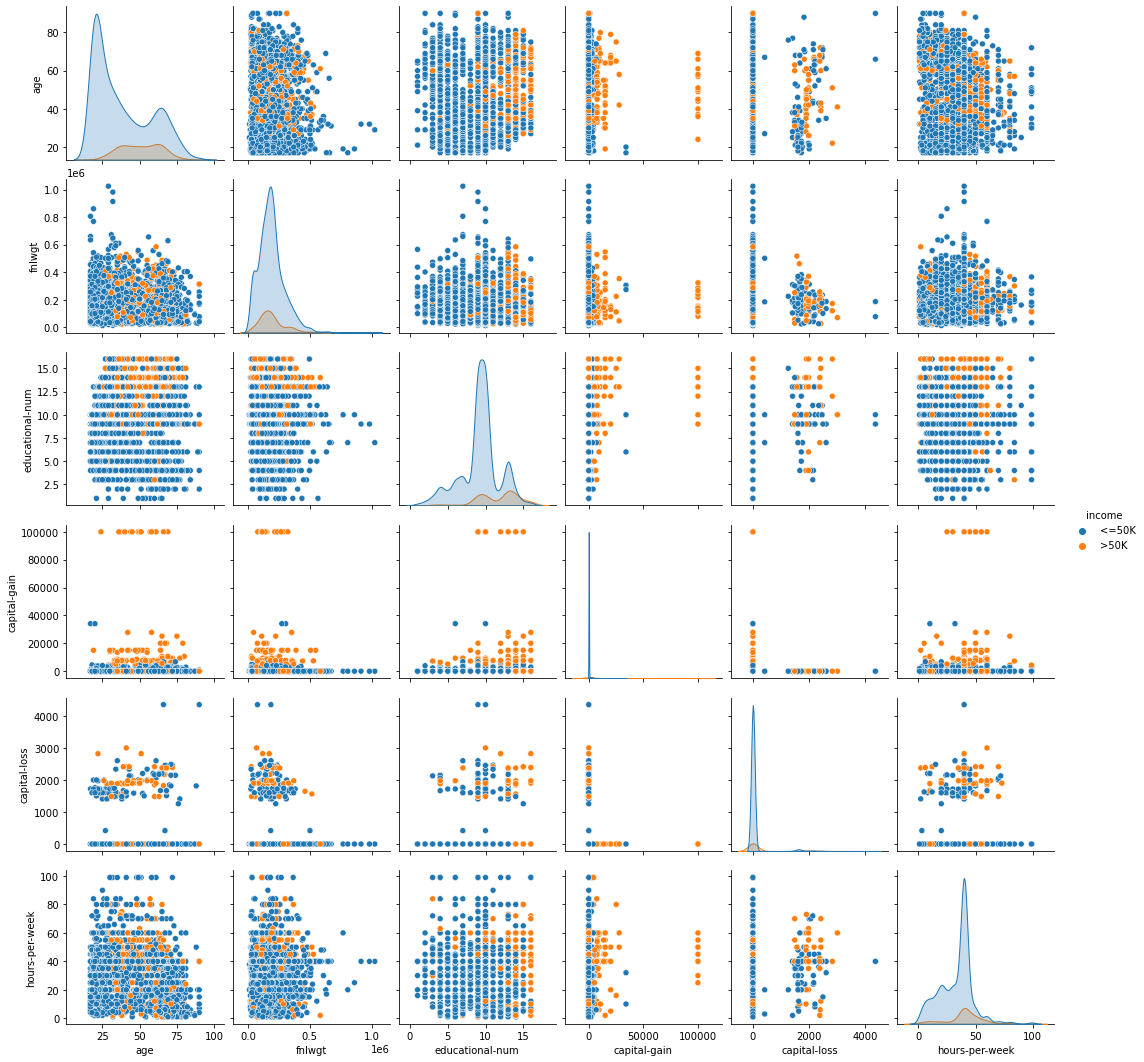

In [66]:
sns.pairplot(missing_rows, hue='income')

In [3]:
income_encoded = income.apply(LabelEncoder().fit_transform)
income_encoded.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,19329,1,6,4,7,3,2,1,0,0,39,39,0
1,21,4,4212,11,8,2,5,0,4,1,0,0,49,39,0
2,11,2,25340,7,11,2,11,0,4,1,0,0,39,39,1
3,27,4,11201,15,9,2,7,0,2,1,98,0,39,39,1
4,1,0,5411,15,9,4,0,3,4,0,0,0,29,39,0


<AxesSubplot:>

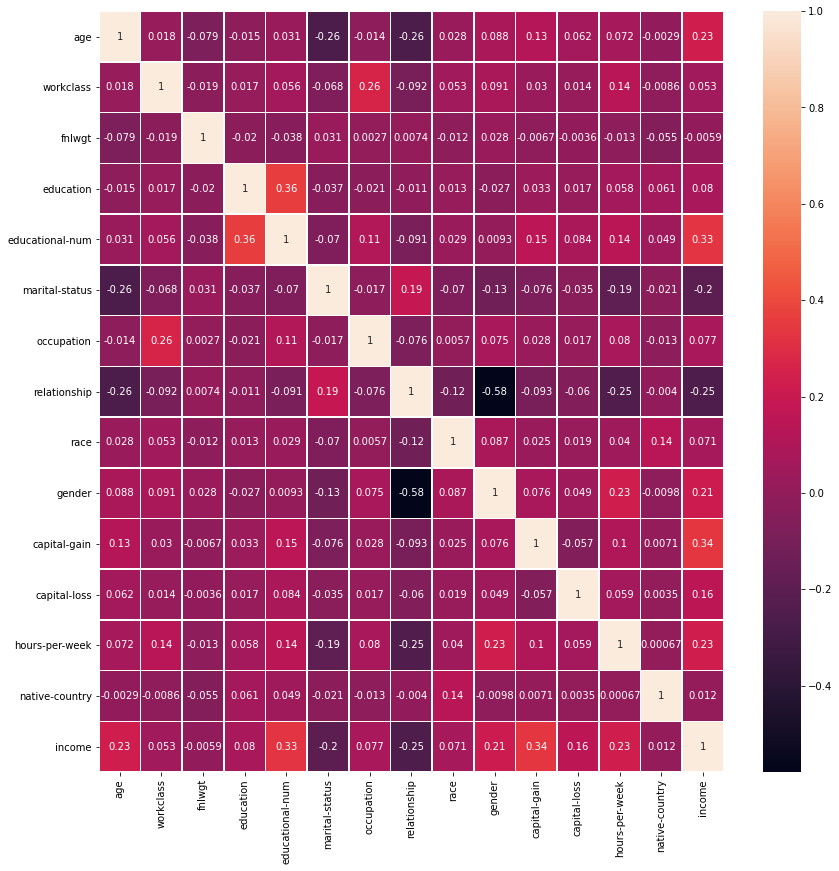

In [6]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(income_encoded.corr(), annot = True, linewidths=.5, ax=ax)

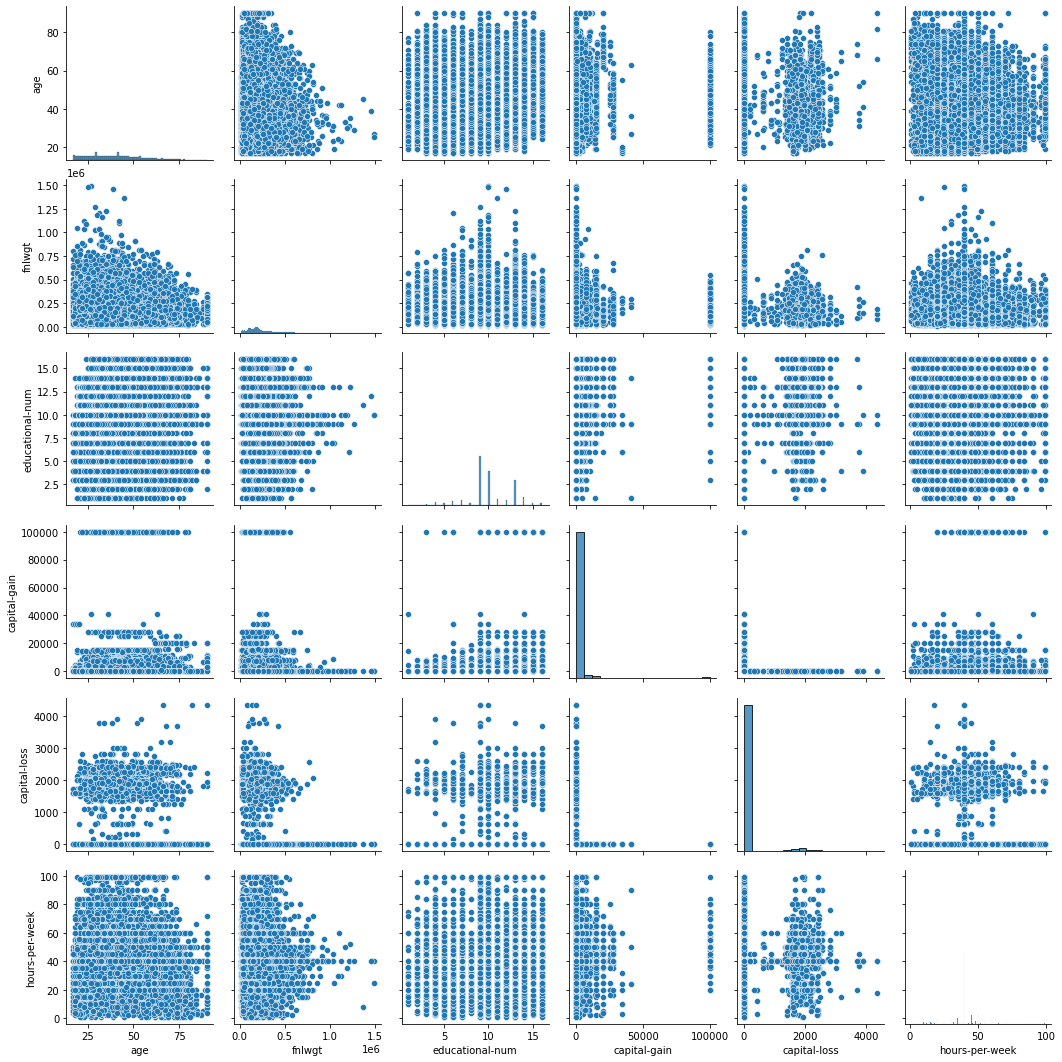

In [17]:
sns.pairplot(income)

## Imputation Models

In [112]:
X = income_encoded.iloc[:, 0:-1]
y = income_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8379568021291841

The base models scores around 84% accuracy, and we hope to beat this and find the best imputation strategies

### Mode

In [140]:
si = SimpleImputer(missing_values='?', strategy='most_frequent')
median_imputation = si.fit_transform(missing_rows)
median_imputation

array([[18, 'Private', 103497, ..., 30, 'United-States', '<=50K'],
       [29, 'Private', 227026, ..., 40, 'United-States', '<=50K'],
       [58, 'Private', 299831, ..., 35, 'United-States', '<=50K'],
       ...,
       [71, 'Private', 287372, ..., 10, 'United-States', '>50K'],
       [41, 'Private', 202822, ..., 32, 'United-States', '<=50K'],
       [72, 'Private', 129912, ..., 25, 'United-States', '<=50K']],
      dtype=object)

In [141]:
missing_encoded = pd.DataFrame(median_imputation).apply(LabelEncoder().fit_transform)
missing_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,3,629,15,9,4,9,3,4,0,0,0,28,36,0
1,12,3,2411,11,8,4,9,4,2,1,0,0,37,36,0
2,41,3,2870,11,8,2,9,0,4,1,0,0,32,36,0
3,23,3,469,10,15,2,9,0,1,1,0,0,42,36,1
4,55,3,992,5,3,0,9,1,4,0,0,0,5,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,18,3,2960,9,12,2,9,5,4,0,0,0,50,36,1
3616,13,3,120,9,12,4,9,1,1,0,0,0,66,36,0
3617,54,3,2805,10,15,2,9,0,4,1,0,0,9,36,1
3618,24,3,2118,11,8,5,9,1,2,0,0,0,29,36,0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(missing_encoded.iloc[:, 0:-1], missing_encoded.iloc[:, -1], random_state=123)
pipe_median = make_pipeline(StandardScaler(),
                            KNeighborsClassifier())
pipe_median.fit(X_train, y_train)
pipe_median.score(X_test, y_test)

0.8928176795580111

Wow! A dramatic increase, showing that a simple mode imputation worked wonders in classifying income. 